In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
target = data[['PRICE']]
features = data.drop('PRICE',  axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [ ]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data shape {X_train.shape}, percentail {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data shape {X_test.shape} percentail {test_pct:.3}%')

Training data shape (404, 13), percentail 79.8% of the total data.
Test data shape (102, 13) percentail 20.2%


In [ ]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)
resid = y_train["PRICE"] - y_pred

In [ ]:
y_train["PRICE"].shape

(404,)

In [ ]:
y_pred.reshape(2,-1)
y_pred.shape

(404,)

In [ ]:
from sklearn import metrics

## Traing accuracy | model evaluation or validation

In [ ]:
# Predicting Test data with the model
#y_train_pred = reg.predict(X_train)# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9789286955804557
Adjusted R^2: 0.9782263187664709
MAE: 0.8223762376237619
MSE: 1.6216654801980208
RMSE: 1.273446300476789


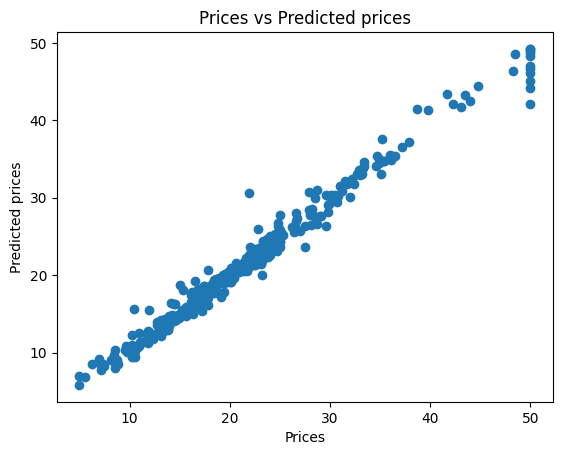

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

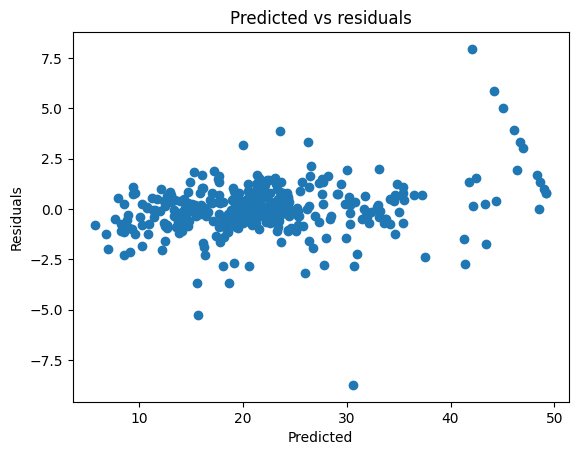

In [ ]:
# Checking residuals
resid = y_train["PRICE"] - y_pred
plt.scatter(y_pred,resid)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## Testing accuracy


In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2: 0.8611938010991234
Adjusted R^2: 0.8406883398978575
MAE: 2.707882352941175
MSE: 14.516455411764705
RMSE: 3.8100466416783805


# SVM model

In [ ]:
target = data[['PRICE']]
features = data.drop('PRICE',  axis=1)

sc = StandardScaler()

X_features = sc.fit_transform(features)
X_target = np.log(data['PRICE'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, target,
                                                    test_size=0.2,
                                                    random_state=10)

train_pct = 100*len(X_train)/len(features)
print(f'Training data shape {X_train.shape}, percentail {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data shape {X_test.shape} percentail {test_pct:.3}%')

Training data shape (404, 13), percentail 79.8% of the total data.
Test data shape (102, 13) percentail 20.2%


In [ ]:
reg = svm.SVR()
reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Training

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6762682259413768
Adjusted R^2: 0.6654771668060895
MAE: 2.7639521373318345
MSE: 24.914672218735294
RMSE: 4.9914599285915635


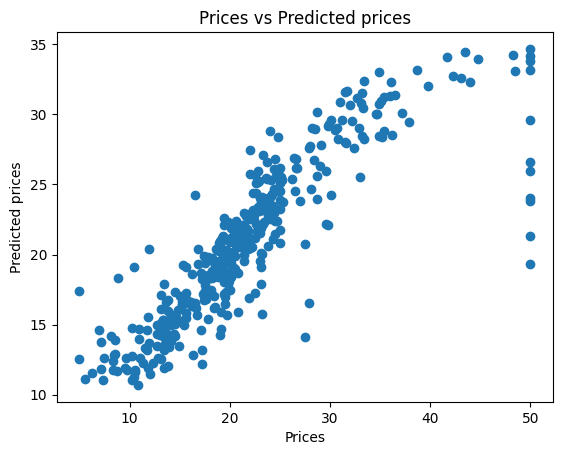

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()


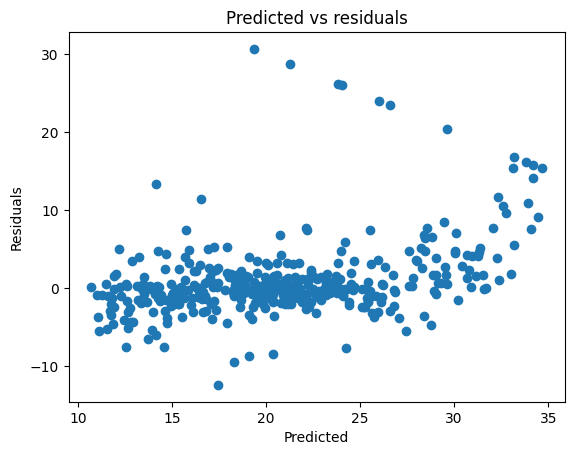

In [ ]:
# Checking residuals
resid = y_train["PRICE"] - y_pred
plt.scatter(y_pred,resid)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Testing

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [96]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.555701595299547
Adjusted R^2: 0.490066603696071
MAE: 4.109972521977229
MSE: 46.46505726994288
RMSE: 6.816528241703608


# Parameter tuning

* C: Regularization parameter, controlling the trade-off between maximizing the margin and minimizing classification error.
* kernel: Specifies the type of kernel function to use (e.g., 'linear,' 'rbf,' 'poly').
* gamma: Kernel coefficient for 'rbf' and 'poly' kernels.

Grid search is a hyperparameter tuning technique that performs an exhaustive search over a specified hyperparameter space to find the combination of hyperparameters that yields the best model performance.




In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}

In [105]:
# Create the RandomizedSearchCV object
randomized_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=20, cv=5)

randomized_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cf3bd389810>,
                                        'gamma': ['scale', 'auto', 0.001,
                                                  0.0013257113655901094,
                                                  0.0017575106248547913,
                                                  0.002329951810515372,
                                                  0.0030888435964774815,
                                                  0.004094915062380427,
                                                  0.005428675439323859,
                                                  0.0071968567300115215,
                                                  0.0095409547634...
                                                  0.022229964825261943,
                                                  0.029470517025518096,
                                                  0.03906939937054617,
                                                  0.0517947467923121,
                                                  0.06866488450043001,
                                                  0.09102981779915217,
                                                  0.1206792640639329,
                                                  0.15998587196060574,
                                                  0.21209508879201905,
                                                  0.28117686979742307,
                                                  0.3727593720314938,
                                                  0.49417133613238334,
                                                  0.655128556859551,
                                                  0.868511373751352,
                                                  1.151395399326447,
                                                  1.5264179671752334,
                                                  2.023589647725158, ...],
                                        'kernel': ['linear', 'rbf', 'poly']})

In [114]:
y_pred = reg.predict(X_train)

In [106]:
# Get the best hyperparameters and model
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_

In [107]:
best_params_rand

{'C': 8.723342746827573, 'gamma': 3.5564803062231287, 'kernel': 'linear'}

In [108]:
best_model_rand

SVR(C=8.723342746827573, gamma=3.5564803062231287, kernel='linear')

In [ ]:
'C': 8.723342746827573, 'gamma': 3.5564803062231287, 'kernel': 'linear'

In [110]:
target = data[['PRICE']]
features = data.drop('PRICE',  axis=1)

sc = StandardScaler()

X_features = sc.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_features, target,
                                                    test_size=0.2,
                                                    random_state=10)

train_pct = 100*len(X_train)/len(features)
print(f'Training data shape {X_train.shape}, percentail {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data shape {X_test.shape} percentail {test_pct:.3}%')

Training data shape (404, 13), percentail 79.8% of the total data.
Test data shape (102, 13) percentail 20.2%


In [113]:
reg = svm.SVR(kernel='rbf', degree=3, gamma=3.5564803062231287, coef0=0.0, tol= 8.723342746827573, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=3.5564803062231287, tol=8.723342746827573)

In [115]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.1409412291002181
Adjusted R^2: 0.11230593673689204
MAE: 5.573537686082731
MSE: 66.11389245258908
RMSE: 8.131044979127166


In [94]:
from sklearn.model_selection import GridSearchCV

In [101]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(best_model_rand, param_grid)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 738, in _validate_targets
    check_classification_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [95]:
#from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params

In [99]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 2/5] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 3/5] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 4/5] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 5/5] END ......................C=0.1, gamma=1;, score=nan total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=0.1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.01;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 3/5] END .....................C=10, gamma=0.1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=10, gamma=0.1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=10, gamma=0.1;, score=nan total time=   0.0s
[CV 1/5] END ....................C=10, gamma=0.01;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, gamma=0.01;, score=nan total time=   0.0s
[CV 3/5] END ....................C=10, gamma=0.01;, score=nan total time=   0.0s
[CV 4/5] END ....................C=10, gamma=0.01;, score=nan total time=   0.0s
[CV 5/5] END ....................C=10, gamma=0.01;, score=nan total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.001;, score=nan total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.001;, score=nan total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.001;, score=nan total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.001;, score=nan total time=   0.0s
[CV 5/5] END ...............

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 3/5] END ..................C=1000, gamma=0.01;, score=nan total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.01;, score=nan total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.01;, score=nan total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.001;, score=nan total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.001;, score=nan total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.001;, score=nan total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.001;, score=nan total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.001;, score=nan total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.0001;, score=nan total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.0001;, score=nan total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.0001;, score=nan total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.0001;, score=nan total time=   0.0s
[CV 5/5] END ...............

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

ValueError: 
All the 125 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 738, in _validate_targets
    check_classification_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
